In [1]:
from tqdm import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

plt.style.use('dark_background')

In [42]:
with open('points.geojson') as f:
    res = json.load(f)
    
# node_id[:, 0] - id
# node_id[:, 1] - visited
# node_id[:, 2] - group
node_id = np.zeros((len(res['features']), 3), dtype='int64')
node_ax = np.zeros((len(res['features']), 2), dtype=float)

for i in tqdm(range(len(res['features']))):
    node_id[i][0] = int(res['features'][i]['id'][5:])
    node_id[i][1] = 0
    node_id[i][2] = (-1)
    node_ax[i][0] = float(res['features'][i]['geometry']['coordinates'][0])
    node_ax[i][1] = float(res['features'][i]['geometry']['coordinates'][1])

100%|██████████| 42483/42483 [00:00<00:00, 324446.41it/s]


In [43]:
df = pd.read_json('Trulala')

# roads[i][0] - id
# roads[i][1] - type
# roads[i][2] - in
# roads[i][3] - out
roads = np.zeros((df.shape[0], 4), dtype='int64')

for i in tqdm(range(df.shape[0])):
    if df['nodes'][i][0] in node_id[:,0] and df['nodes'][i][1] in node_id:
        roads[i][0] = df['r_id'][i]
        roads[i][1] = df['type'][i]
        roads[i][2] = df['nodes'][i][0]
        roads[i][3] = df['nodes'][i][1]

100%|██████████| 46446/46446 [00:06<00:00, 7179.75it/s]


  7%|▋         | 3047/46446 [00:04<01:01, 705.17it/s]


KeyboardInterrupt: 

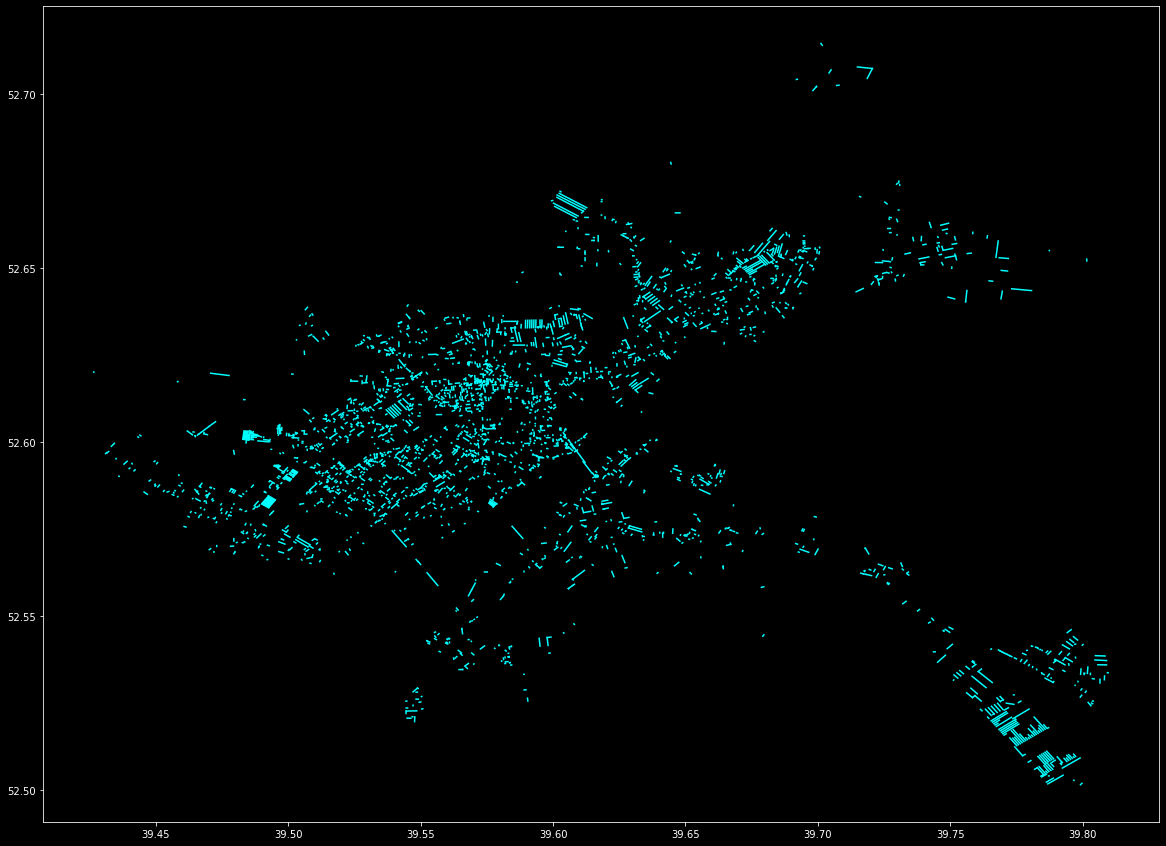

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

for i in tqdm(range(roads.shape[0])):
    p1, p2 = roads[i][2:]
    x1, y1 = node_ax[np.where(node_id == p1)[0][0]]
    x2, y2 = node_ax[np.where(node_id == p2)[0][0]]
    plt.plot((x1, x2), (y1, y2), color='cyan')

In [44]:
def bfs(v_id, cur_id, node_id, roads):
    it = np.where(node_id[:, 0] == v_id)[0][0]

    node_id[it, 1] = 1
    node_id[it, 2] = cur_id
    
    if v_id in roads[:,2]:
        _in = np.where(roads[:, 2] == v_id)[0]
        for ver in _in:
            new_id = roads[ver, 3]
            new_it = np.where(node_id[:, 0] == new_id)[0][0]
            if node_id[new_it, 1] != 1:
                bfs(new_id, cur_id, node_id, roads)
            
#     if v_id in roads[:,3]:
#         _in = np.where(roads[:, 3] == v_id)[0]
#         for ver in _in:
#             new_id = roads[ver, 2]
#             new_it = np.where(node_id[:, 0] == new_id)[0][0]
#             if node_id[new_it, 1] != 1:
#                 bfs(new_id, cur_id, node_id, roads)

In [45]:
node_id[:, 1]

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
_id = 0

for i in tqdm(range(node_id.shape[0])):
    if node_id[i, 1] == 0:
        bfs(node_id[i, 0], _id, node_id, roads)
        _id += 1

100%|██████████| 42483/42483 [00:10<00:00, 4147.75it/s] 


In [57]:
d = dict()
for i in tqdm(range(node_id.shape[0])):
    if node_id[i, 2] not in d:
        d[node_id[i, 2]] = 0
    else:
        d[node_id[i, 2]] += 1

_max = 0
_id_max = 0
for i in range(len(d)):
    if d[i] > _max:
        _max = d[i]
        _id_max = i
        
print(_max, _id_max)

100%|██████████| 42483/42483 [00:00<00:00, 1152036.37it/s]

14820 21


In [60]:
node_id_n = np.zeros((_max + 1, 3), dtype='int64')
j = 0
for i in tqdm(range(node_id.shape[0])):
    if node_id[i, 2] == _id_max:
        node_id_n[j, 0] = node_id[i, 0]
        node_id_n[j, 1] = node_id[i, 1]
        j += 1
        
node_id_n

100%|██████████| 42483/42483 [00:00<00:00, 1091401.76it/s]


array([[ 331979696,          1,          0],
       [ 331979701,          1,          0],
       [ 331979705,          1,          0],
       ...,
       [9168420508,          1,          0],
       [9168420510,          1,          0],
       [9168420511,          1,          0]])

In [61]:
roadon = []
for i in tqdm(range(roads.shape[0])):
    if roads[i, 2] in node_id_n and roads[i, 3] in node_id_n:
        roadon.append(roads[i])
        
len(roadon)

roads_n = np.zeros((len(roadon), 4), dtype="")
for i in tqdm(range(roadon)):
    

100%|██████████| 46446/46446 [00:01<00:00, 31391.61it/s]


16480